<a href="https://colab.research.google.com/github/SALMA55ASHRAF/AI_instant_tasks/blob/master/Cohort_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/cohorts.csv")
df.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [3]:
df.isnull().sum()

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [4]:
df.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

In [5]:
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
df.describe()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
count,30,30.000000,30.000000,30.000000,30.000000
mean,2023-11-08 12:00:00,3418.166667,1352.866667,208.259594,136.037157
min,2023-10-25 00:00:00,1929.000000,784.000000,59.047619,0.000000
25%,2023-11-01 06:00:00,3069.000000,1131.500000,182.974287,68.488971
50%,2023-11-08 12:00:00,3514.500000,1388.000000,206.356554,146.381667
75%,2023-11-15 18:00:00,3829.500000,1543.750000,230.671046,220.021875
max,2023-11-23 00:00:00,4790.000000,1766.000000,445.872340,304.350000
std,NaN,677.407486,246.793189,64.730830,96.624319


In [7]:
# now lets see trend (inc or dec) of new users and returning users
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=df['Date'], y=df['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=df['Date'], y=df['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

In [8]:
# lets see trend of  duration over time
fig = px.line(data_frame=df, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

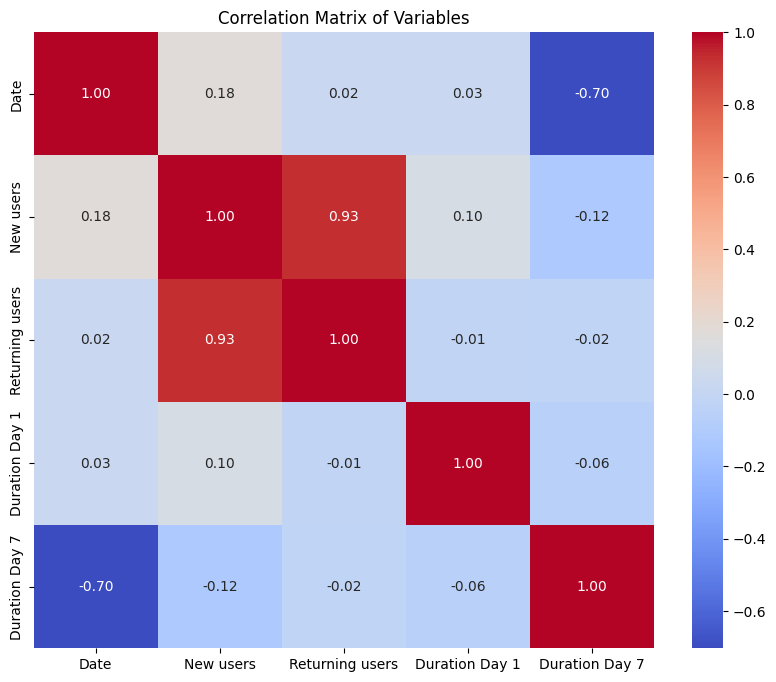

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [10]:
# Grouping data by week
df['Week'] = df['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = df.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()
weekly_averages

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


In [11]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

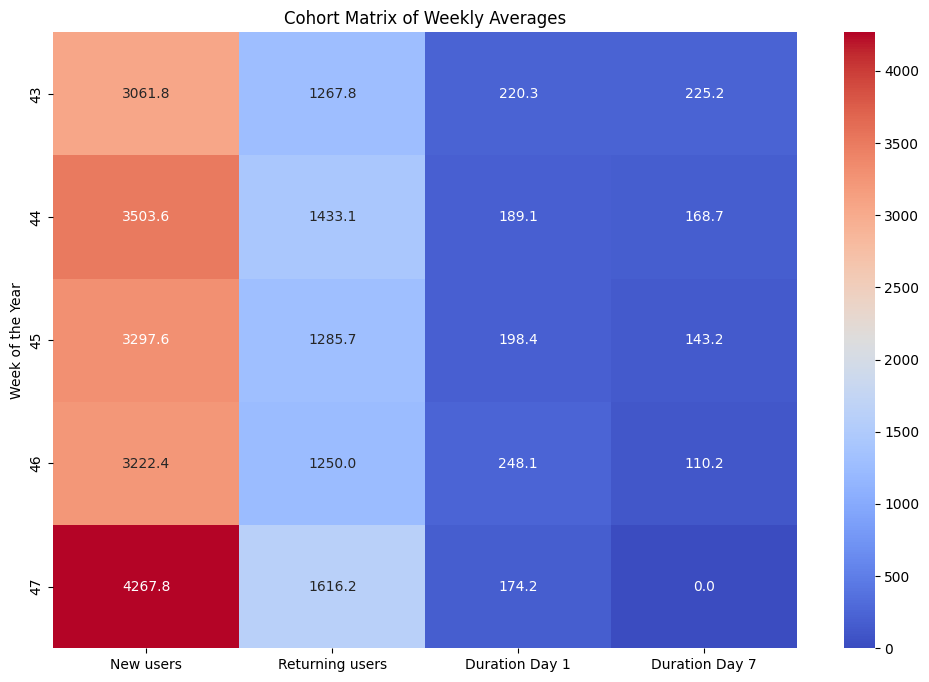

In [12]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()